# Import Libraries

In [959]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
#from sklearn.preprocessing import LabelBinarizer

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.9.1


# Import Dataset from csv file

In [960]:
df = pd.read_csv(r'Dataset\dataset-song-genre.csv')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3txHZTpGeVASXa5ARwoRX6,Frejat,Frejat Ao Vivo No Rock In Rio,Puro Êxtase - Ao Vivo,45,292186,False,0.571,0.924,9,-4.727,1,0.1970,0.179000,0.000004,0.7190,0.5000,121.056,4,r-n-b
1,2e7LBdeiidf0ZC5Qj52u0G,STU48,無謀な夢は覚めることがない【劇場盤】,奇跡という名のストーリー,19,242099,False,0.368,0.826,6,-3.448,1,0.0421,0.057200,0.000000,0.2030,0.6630,83.102,4,j-idol
2,0hlh787aY52rcNvJHnE0Ml,Mike NRG;Weapon X,Lost in Dreams (Q-Base OST 2008),Lost In Dreams - Weapon X Remix,23,296360,False,0.547,0.867,6,-5.040,1,0.0326,0.054600,0.489000,0.0735,0.2530,163.002,4,hardstyle
3,3s067jTdOv8wnuUHeXdtjT,NICO Touches the Walls,オーロラ,ホログラム,56,248906,False,0.388,0.894,0,-3.425,1,0.0455,0.000808,0.000000,0.1990,0.7240,156.120,4,anime
4,4oE62AqzUuiwV09HGxiMlu,Edvard Grieg;Una Bourne,"Mozart, Liszt & Others: Piano Works","Lyric Pieces I, Op. 12 (Excerpts): No. 6, Norsk",0,42306,False,0.345,0.236,2,-21.922,1,0.0401,0.989000,0.952000,0.2280,0.3800,135.677,4,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91195,0Y1hw2GXV8npQI7C21ZIT1,Surfaces,Hidden Gems,Wave of You,0,213842,False,0.695,0.656,1,-6.038,1,0.0489,0.057000,0.000000,0.2670,0.3460,90.986,4,soul
91196,43QSsuxazI8xms29SYCtxh,KANA-BOON;もっさ,ないものねだり - Revenge THE FIRST TAKE,ないものねだり - Revenge THE FIRST TAKE,58,256256,False,0.565,0.811,1,-3.745,0,0.0570,0.014100,0.000000,0.0726,0.6910,87.508,4,j-pop
91197,7nbj09isjVmgNYJ7eKBzyt,Zach Bryan,Your Perfect Soundtrack,Something in the Orange,0,228013,False,0.369,0.192,4,-12.151,0,0.0400,0.555000,0.000008,0.0954,0.1480,175.212,3,country
91198,5bVUUTXB0Dg7EzuSZC57ek,Joey Montana;Sebastian Yatra,Regageton Para Niños,Suena El Dembow,1,195760,False,0.690,0.858,0,-4.431,1,0.0529,0.189000,0.000000,0.1130,0.7550,91.884,4,reggaeton


In [961]:
df.shape

(91200, 20)

# Estamos verificando datos con fallas y eliminandolos del dataframe

In [962]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [963]:
df = df.dropna()

In [964]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# volvemos datos booleanos a numéricos

In [965]:
df = df.astype({'explicit':'int'})

In [966]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
91195    0
91196    0
91197    0
91198    0
91199    0
Name: explicit, Length: 91199, dtype: int32

Creamos Diccionario de Labels

In [967]:
label_dict = dict(enumerate(set(df.track_genre.transpose())))
label_dict

{0: 'mandopop',
 1: 'opera',
 2: 'jazz',
 3: 'afrobeat',
 4: 'r-n-b',
 5: 'hardcore',
 6: 'j-dance',
 7: 'folk',
 8: 'disney',
 9: 'detroit-techno',
 10: 'british',
 11: 'french',
 12: 'iranian',
 13: 'world-music',
 14: 'samba',
 15: 'rockabilly',
 16: 'gospel',
 17: 'latino',
 18: 'romance',
 19: 'trance',
 20: 'turkish',
 21: 'sleep',
 22: 'trip-hop',
 23: 'honky-tonk',
 24: 'bluegrass',
 25: 'dance',
 26: 'chicago-house',
 27: 'brazil',
 28: 'edm',
 29: 'metal',
 30: 'punk-rock',
 31: 'rock',
 32: 'forro',
 33: 'dub',
 34: 'reggae',
 35: 'singer-songwriter',
 36: 'progressive-house',
 37: 'ambient',
 38: 'songwriter',
 39: 'reggaeton',
 40: 'ska',
 41: 'j-idol',
 42: 'electronic',
 43: 'drum-and-bass',
 44: 'j-rock',
 45: 'kids',
 46: 'chill',
 47: 'new-age',
 48: 'acoustic',
 49: 'synth-pop',
 50: 'latin',
 51: 'sad',
 52: 'disco',
 53: 'comedy',
 54: 'psych-rock',
 55: 'country',
 56: 'blues',
 57: 'breakbeat',
 58: 'metalcore',
 59: 'pop-film',
 60: 'guitar',
 61: 'malay',
 62: 

Creamos Diccionario Invertido

In [968]:
inv_label_dict = {v: k for k, v in label_dict.items()}
inv_label_dict

{'mandopop': 0,
 'opera': 1,
 'jazz': 2,
 'afrobeat': 3,
 'r-n-b': 4,
 'hardcore': 5,
 'j-dance': 6,
 'folk': 7,
 'disney': 8,
 'detroit-techno': 9,
 'british': 10,
 'french': 11,
 'iranian': 12,
 'world-music': 13,
 'samba': 14,
 'rockabilly': 15,
 'gospel': 16,
 'latino': 17,
 'romance': 18,
 'trance': 19,
 'turkish': 20,
 'sleep': 21,
 'trip-hop': 22,
 'honky-tonk': 23,
 'bluegrass': 24,
 'dance': 25,
 'chicago-house': 26,
 'brazil': 27,
 'edm': 28,
 'metal': 29,
 'punk-rock': 30,
 'rock': 31,
 'forro': 32,
 'dub': 33,
 'reggae': 34,
 'singer-songwriter': 35,
 'progressive-house': 36,
 'ambient': 37,
 'songwriter': 38,
 'reggaeton': 39,
 'ska': 40,
 'j-idol': 41,
 'electronic': 42,
 'drum-and-bass': 43,
 'j-rock': 44,
 'kids': 45,
 'chill': 46,
 'new-age': 47,
 'acoustic': 48,
 'synth-pop': 49,
 'latin': 50,
 'sad': 51,
 'disco': 52,
 'comedy': 53,
 'psych-rock': 54,
 'country': 55,
 'blues': 56,
 'breakbeat': 57,
 'metalcore': 58,
 'pop-film': 59,
 'guitar': 60,
 'malay': 61,
 'hap

In [969]:
train_labels_num = []
for label in df.track_genre.transpose():
    train_labels_num.append(inv_label_dict[label])

train_labels_num

[4,
 41,
 100,
 87,
 89,
 32,
 104,
 73,
 32,
 18,
 16,
 111,
 29,
 112,
 97,
 86,
 65,
 30,
 95,
 14,
 25,
 60,
 86,
 64,
 64,
 82,
 38,
 110,
 44,
 74,
 94,
 110,
 59,
 113,
 112,
 101,
 45,
 77,
 63,
 67,
 58,
 44,
 92,
 95,
 10,
 49,
 62,
 93,
 66,
 52,
 25,
 76,
 33,
 29,
 85,
 49,
 23,
 78,
 106,
 48,
 21,
 12,
 12,
 102,
 25,
 7,
 43,
 1,
 106,
 65,
 2,
 60,
 106,
 52,
 44,
 87,
 68,
 13,
 86,
 59,
 7,
 31,
 90,
 59,
 65,
 83,
 24,
 110,
 27,
 73,
 42,
 82,
 71,
 3,
 108,
 87,
 32,
 54,
 39,
 92,
 77,
 16,
 28,
 9,
 25,
 32,
 23,
 3,
 61,
 91,
 75,
 102,
 10,
 32,
 96,
 94,
 26,
 57,
 14,
 107,
 31,
 89,
 70,
 51,
 37,
 27,
 69,
 78,
 53,
 2,
 43,
 89,
 4,
 6,
 36,
 19,
 73,
 11,
 48,
 100,
 35,
 49,
 21,
 91,
 40,
 80,
 14,
 113,
 9,
 39,
 87,
 97,
 44,
 24,
 76,
 84,
 101,
 62,
 58,
 73,
 62,
 62,
 111,
 17,
 17,
 1,
 19,
 10,
 25,
 35,
 81,
 61,
 77,
 85,
 79,
 18,
 91,
 40,
 65,
 113,
 29,
 89,
 52,
 111,
 12,
 107,
 6,
 82,
 85,
 82,
 28,
 22,
 52,
 110,
 97,
 103,
 36,
 56

In [970]:
df['track_genre_num'] = train_labels_num

In [971]:
df[10:20]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
10,2sxzZLirKtZchuUlECg9C1,Mara Lima,"Recordações, Vol. 2",Divino Companheiro,39,203624,0,0.420,0.560,0,...,1,0.0379,0.36900,0.000000,0.2650,0.430,199.451,3,gospel,16
11,4dDminjzc0pePZIetS8mlZ,Rafael Lechowski,El Canto de Amor a la Vida,Desear Lo Que Ya Es Nuestro (Respira),29,245680,0,0.550,0.674,1,...,1,0.0617,0.47800,0.000108,0.1060,0.530,81.137,4,spanish,111
12,0oerlffJSzhRVvtDfLcp3N,Bon Jovi,Slippery When Wet,Wanted Dead Or Alive,75,308666,0,0.252,0.802,7,...,1,0.0391,0.13000,0.014600,0.3090,0.253,150.056,4,metal,29
13,20DigsfRILHYKeMqbuDqtx,Sweet Little Band,Coldplay Para bebes,In My Place,30,192493,0,0.503,0.263,9,...,1,0.0298,0.94300,0.943000,0.0845,0.152,143.948,4,children,112
14,3AIPpo3z8KTN4hHhY7qRw8,Los Hitters,Grandes Exitos,Un Hombre Respetable,39,150413,0,0.563,0.646,9,...,0,0.1170,0.15600,0.000000,0.3100,0.592,175.107,4,rock-n-roll,97
15,6nvbYcbL79UQ5VFKE0aeeq,Kari Jobe,Sad Love Songs 2022,In The Name Of Love - Recorded At Spotify Stud...,2,205738,0,0.675,0.375,6,...,1,0.0452,0.54200,0.000003,0.0951,0.187,134.023,4,alternative,86
16,6bcIyAwnUIF34YelBWqMrS,Therion,Les Épaves,L'amour est bleu - Mellow Version,22,207306,0,0.556,0.675,7,...,1,0.0238,0.02480,0.001600,0.1440,0.357,105.024,4,black-metal,65
17,5kEOGfiGkDwGnNoGlepPJI,INSITE,Una Vida No Es Suficiente,Destrózame,36,205080,0,0.482,0.929,0,...,1,0.0468,0.00105,0.000000,0.0729,0.317,97.543,4,punk-rock,30
18,59kkETYRczNrB6VOasIpxC,Oscar D'León,Salsa x siempre,Que Se Sienta,0,285663,0,0.597,0.829,10,...,1,0.0369,0.37800,0.000023,0.0649,0.921,171.491,4,salsa,95
19,5LqdIFraDk9bpzD0pRoBdl,Toninho Geraes,"Tudo Que Sou, Vol. 1: Fragmentos (Ao Vivo)",Se a Fila Andar - Ao Vivo,43,270982,0,0.536,0.809,11,...,0,0.0707,0.62800,0.000000,0.9640,0.460,95.040,4,samba,14


In [972]:
# dividing dataset to data to train and data to test
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [973]:
train_dataset.shape

(72959, 21)

In [974]:
test_dataset.shape

(18240, 21)

In [975]:
#know the column labels from dataset
train_dataset.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'track_genre_num'],
      dtype='object')

In [976]:
#sns.pairplot(train_dataset[['popularity',
#       'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'key',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']], diag_kind="kde")

In [977]:
train_dataset = train_dataset.drop(['track_id','artists','album_name','track_name','explicit','key','time_signature','track_genre'],axis=1)

In [978]:
train_labels = train_dataset.pop('track_genre_num')

In [979]:
train_labels

5413      25
64083     88
62381     85
24917     76
73671     84
        ... 
9457      12
58285    102
89873     70
62841     80
75130     39
Name: track_genre_num, Length: 72959, dtype: int64

In [980]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,33.331529,22.294772,0.000,17.0000,35.00000,50.0000,100.000
duration_ms,72959.0,227690.246810,106562.673902,8586.000,174062.0000,212845.00000,260907.5000,4789026.000
danceability,72959.0,0.567351,0.173699,0.000,0.4560,0.58100,0.6960,0.985
energy,72959.0,0.641243,0.251494,0.000,0.4730,0.68400,0.8530,1.000
loudness,72959.0,-8.266214,5.055703,-49.531,-10.0200,-7.00000,-4.9995,3.156
mode,72959.0,0.637564,0.480707,0.000,0.0000,1.00000,1.0000,1.000
speechiness,72959.0,0.084279,0.104907,0.000,0.0359,0.04890,0.0842,0.965
acousticness,72959.0,0.314746,0.332257,0.000,0.0170,0.16900,0.5970,0.996
instrumentalness,72959.0,0.155217,0.309202,0.000,0.0000,0.00004,0.0461,1.000
liveness,72959.0,0.213076,0.189739,0.000,0.0980,0.13200,0.2730,1.000


In [981]:
train_dataset.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,0.000000,18.000000,54.0000,44.0000,23.000000,10.0000,10.0000,78.000000,43.000000,0.000000,...,0.000,56.0000,1.000000,53.0000,66.000,1.0000,21.000000,76.000000,0.0000,0.000
duration_ms,164818.000000,67725.000000,200021.0000,193012.0000,268426.000000,183169.0000,156720.0000,241970.000000,380800.000000,129332.000000,...,229826.000,177525.0000,266706.000000,232178.0000,169813.000,630595.0000,278520.000000,194165.000000,159735.0000,227280.000
danceability,0.754000,0.435000,0.7760,0.8460,0.546000,0.4230,0.4050,0.727000,0.224000,0.798000,...,0.714,0.7030,0.485000,0.8490,0.623,0.1590,0.599000,0.609000,0.6820,0.874
energy,0.763000,0.712000,0.8140,0.7470,0.969000,0.2060,0.4690,0.681000,0.499000,0.625000,...,0.671,0.4980,0.924000,0.3780,0.796,0.1810,0.583000,0.449000,0.9190,0.690
loudness,-4.627000,-8.452000,-5.8600,-5.9980,-5.050000,-23.2090,-12.3200,-7.114000,-7.400000,-6.830000,...,-5.119,-6.6880,-4.046000,-11.9720,-2.981,-18.4120,-6.960000,-13.291000,-3.1800,-6.373
mode,0.000000,1.000000,0.0000,0.0000,0.000000,0.0000,1.0000,0.000000,0.000000,1.000000,...,1.000,0.0000,1.000000,0.0000,0.000,1.0000,1.000000,0.000000,0.0000,1.000
speechiness,0.043500,0.153000,0.0737,0.0694,0.051200,0.0345,0.0437,0.026500,0.037900,0.130000,...,0.362,0.0805,0.057900,0.0455,0.199,0.0566,0.027300,0.249000,0.0874,0.114
acousticness,0.030100,0.000163,0.0336,0.0694,0.001960,0.9360,0.4520,0.002140,0.037900,0.383000,...,0.292,0.0639,0.037300,0.3240,0.659,0.9790,0.624000,0.326000,0.2560,0.121
instrumentalness,0.000022,0.916000,0.0000,0.0000,0.000051,0.9470,0.0000,0.000307,0.000007,0.000033,...,0.000,0.0284,0.000002,0.5830,0.000,0.9120,0.000078,0.000115,0.0000,0.000
liveness,0.090100,0.184000,0.1090,0.1440,0.142000,0.1000,0.3830,0.086100,0.078000,0.125000,...,0.325,0.1130,0.248000,0.2930,0.115,0.0720,0.370000,0.147000,0.4430,0.249


# Normalizando los datos


In [982]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,1.967690e-16,1.0,-1.495038,-0.732527,0.074837,0.747640,2.990319
duration_ms,72959.0,4.342160e-17,1.0,-2.056107,-0.503255,-0.139310,0.311716,42.804254
danceability,72959.0,5.179309e-14,1.0,-3.266287,-0.641055,0.078581,0.740646,2.404445
energy,72959.0,-8.411438e-15,1.0,-2.549740,-0.668977,0.170011,0.841996,1.426504
loudness,72959.0,2.202361e-14,1.0,-8.162027,-0.346893,0.250453,0.646144,2.259273
mode,72959.0,-3.361163e-15,1.0,-1.326303,-1.326303,0.753965,0.753965,0.753965
speechiness,72959.0,2.089112e-14,1.0,-0.803361,-0.461155,-0.337236,-0.000749,8.395221
acousticness,72959.0,8.131865e-15,1.0,-0.947298,-0.896133,-0.438656,0.849504,2.050381
instrumentalness,72959.0,9.368210e-15,1.0,-0.501991,-0.501991,-0.501861,-0.352897,2.732141
liveness,72959.0,-9.422616e-15,1.0,-1.122998,-0.606498,-0.427305,0.315821,4.147401


In [983]:
normed_train_data.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,-1.495038,-0.687674,0.927055,0.478519,-0.463406,-1.046502,-1.046502,2.003540,0.433665,-1.495038,...,-1.495038,1.016762,-1.450184,0.882201,1.465297,-1.450184,-0.553113,1.913833,-1.495038,-1.495038
duration_ms,-0.590003,-1.501138,-0.259652,-0.325426,0.382270,-0.417794,-0.665995,0.134003,1.436805,-0.923008,...,0.020042,-0.470758,0.366130,0.042114,-0.543129,3.780918,0.476994,-0.314606,-0.637702,-0.003850
danceability,1.074557,-0.761954,1.201213,1.604209,-0.122917,-0.831039,-0.934666,0.919116,-1.976699,1.327869,...,0.844274,0.780946,-0.474099,1.621481,0.320379,-2.350910,0.182209,0.239780,0.660047,1.765408
energy,0.484134,0.281346,0.686922,0.420514,1.303240,-1.730633,-0.684882,0.158082,-0.565594,-0.064588,...,0.118320,-0.569570,1.124309,-1.046720,0.615350,-1.830040,-0.231590,-0.764406,1.104428,0.193868
loudness,0.719824,-0.036748,0.475941,0.448645,0.636156,-2.955630,-0.801824,0.227904,0.171334,0.284078,...,0.622508,0.312165,0.834743,-0.732991,1.045396,-2.006800,0.258364,-0.993885,1.006035,0.374471
mode,-1.326303,0.753965,-1.326303,-1.326303,-1.326303,-1.326303,0.753965,-1.326303,-1.326303,0.753965,...,0.753965,-1.326303,0.753965,-1.326303,-1.326303,0.753965,0.753965,-1.326303,-1.326303,0.753965
speechiness,-0.388710,0.655067,-0.100837,-0.141826,-0.315312,-0.474500,-0.386804,-0.550758,-0.442090,0.435826,...,2.647298,-0.036018,-0.251446,-0.369646,1.093548,-0.263838,-0.543132,1.570159,0.029754,0.283311
acousticness,-0.856706,-0.946808,-0.846172,-0.738424,-0.941399,1.869798,0.413095,-0.940857,-0.833230,0.205424,...,-0.068460,-0.754977,-0.835036,0.027851,1.036106,1.999216,0.930766,0.033870,-0.176810,-0.583122
instrumentalness,-0.501919,2.460474,-0.501991,-0.501991,-0.501825,2.560732,-0.501991,-0.500998,-0.501967,-0.501883,...,-0.501991,-0.410141,-0.501985,1.383508,-0.501991,2.447538,-0.501737,-0.501619,-0.501991,-0.501991
liveness,-0.648135,-0.153244,-0.548524,-0.364060,-0.374601,-0.595958,0.895565,-0.669216,-0.711906,-0.464198,...,0.589882,-0.527442,0.184061,0.421229,-0.516902,-0.743529,0.827050,-0.348249,1.211789,0.189332


# Construyendo el modelo

In [984]:
len(normed_train_data.keys())

12

In [985]:
normed_train_data.shape

(72959, 12)

In [986]:
len(label_dict)

114

In [987]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
])

In [988]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model

In [989]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 512)               6656      
                                                                 
 dense_110 (Dense)           (None, 128)               65664     
                                                                 
 dense_111 (Dense)           (None, 114)               14706     
                                                                 
Total params: 87,026
Trainable params: 87,026
Non-trainable params: 0
_________________________________________________________________


In [990]:
hist = model.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=10)

Epoch 1/10
1824/1824 [==============================] - 3s 1ms/step - loss: 3.3615 - accuracy: 0.1900 - val_loss: 3.0747 - val_accuracy: 0.2299
Epoch 2/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.9626 - accuracy: 0.2491 - val_loss: 2.9160 - val_accuracy: 0.2559
Epoch 3/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.8224 - accuracy: 0.2720 - val_loss: 2.8306 - val_accuracy: 0.2707
Epoch 4/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7244 - accuracy: 0.2880 - val_loss: 2.7717 - val_accuracy: 0.2802
Epoch 5/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6524 - accuracy: 0.3022 - val_loss: 2.7302 - val_accuracy: 0.2910
Epoch 6/10
1824/1824 [==============================] - 3s 1ms/step - loss: 2.5999 - accuracy: 0.3114 - val_loss: 2.6901 - val_accuracy: 0.2969
Epoch 7/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.5577 - accuracy: 0.3186 - val_loss: 2.6649 - val_accuracy:

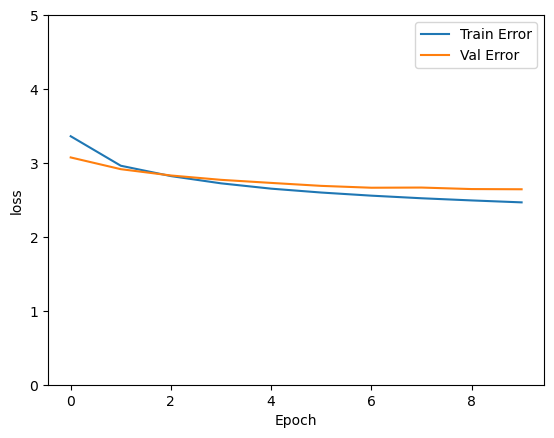

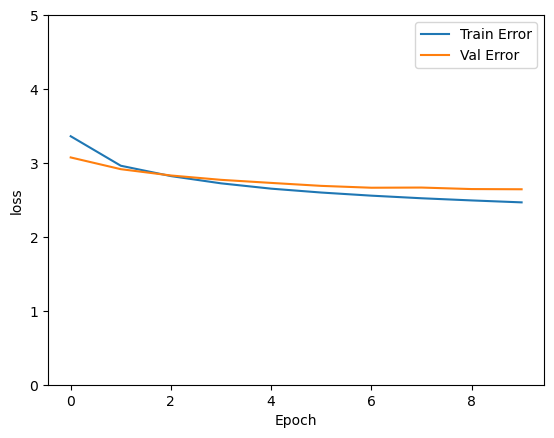

In [991]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()

plot_history(hist)